In [1]:
%%html 
<link href="https://fonts.googleapis.com/css?family=Open+Sans" rel="stylesheet">
<style>#notebook-container{font-size: 13pt;font-family:'Open Sans', sans-serif;} div.text_cell{max-width: 104ex;}</style>

In [2]:
%matplotlib notebook

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split

# Linear Models

Linear models make a prediction using a _linear function_ of the input features.

## Linear models for regression

The general prediction formula for a linear model looks as follows:

$$\hat{y} = w_0 \cdot x_0 + w_1 \cdot x_1 + \ldots + w_p \cdot x_p + b$$

Here, $x_0$ to $x_p$ denotes the features (in this example the number of features is $p+1$) of a single data point, $w$ and $b$ are parameters of the model that are learned, and $\hat{y}$ is the prediction the model makes. For a dataset with a single feature this is:

$$\hat{y} = w_0 \cdot x_0 + b$$

Here, $w_0$ is the slope and $b$ is the y-axis offset.

w[0]: 0.393906  b: -0.031804


<IPython.core.display.Javascript object>


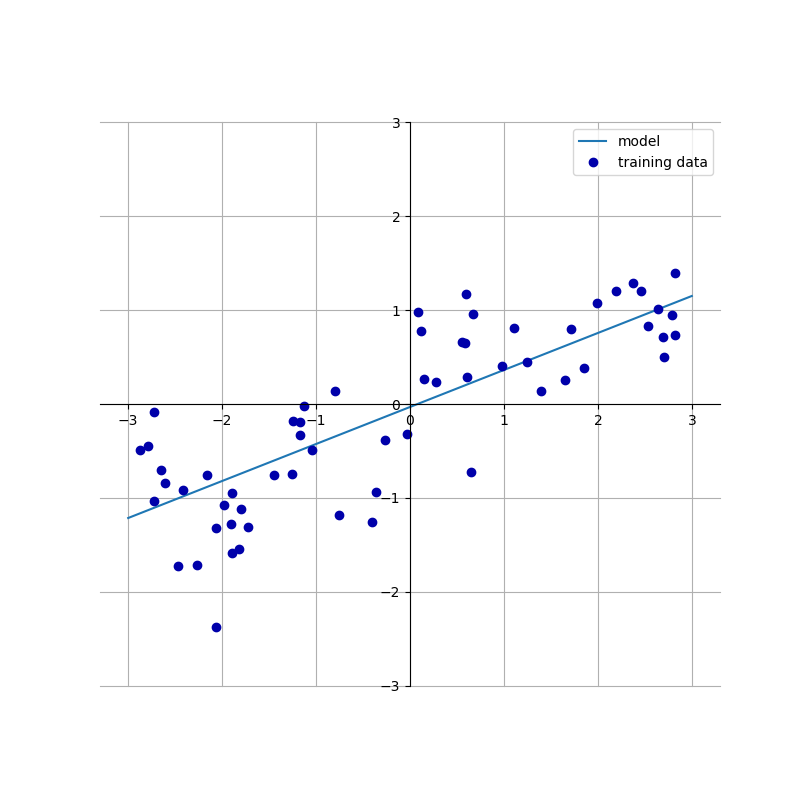

In [4]:
mglearn.plots.plot_linear_regression_wave()

## Linear regression (aka ordinary least squares)

Linear regression, or _ordinary least squares_ (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters $w$ and $b$ that minimize the _mean squared error_ between predictions and the true regression targets, $y$, on the training data set. The mean squared error is the sum of the squared differences between the predictions and the true values.

In [9]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The slope parameters $w$, also called weights or _coefficients_ are stored in the `coef_` attribute, while the offset or _intercept_ $b$ is stored in the `intercept_` attribute.

In [10]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.03180434302675973


In [11]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An $R^2$ of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.

In [12]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [13]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This disrepancy between performance on the training and test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity.

## Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same as one used for ordinary least squares. In ridge regression, though, the coefficients $w$ are chosen not only so that they predict well on the training data, but also to fit an additional constraint.

We also want the magnitude of the coefficients to be as small as possible; in other words, all entries of $w$ should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called _regularization_. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


With linear regression, we were overfitting our data. `Ridge` is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training data, but better generalization.

How much importance the model places on simplicity versus training set performance can be specified by the user, using the `alpha` parameters.

In [16]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing `alpha` allows the coefficients to be less restricted. For very small values of `alpha`, coefficients are barely restricted at all, and we end up with a model that resembles `LinearRegression`.

In [17]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can also get a more qualitative insight into how the `alpha` parameter changes the model by inspecting the `coef_` attribute of models with different values of `alpha`.

<IPython.core.display.Javascript object>


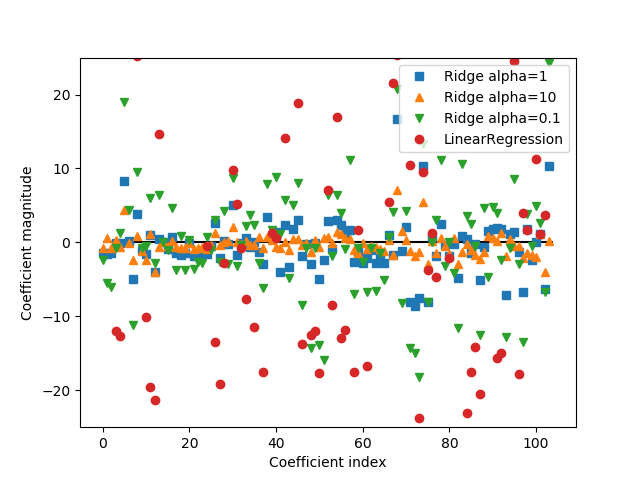

In [21]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend();

Another way to understand the influence of regularization is to fix a value of `alpha` but vary the amount of training data available. The following plots show model performance as a function of dataset size called _learning curves_.

<IPython.core.display.Javascript object>


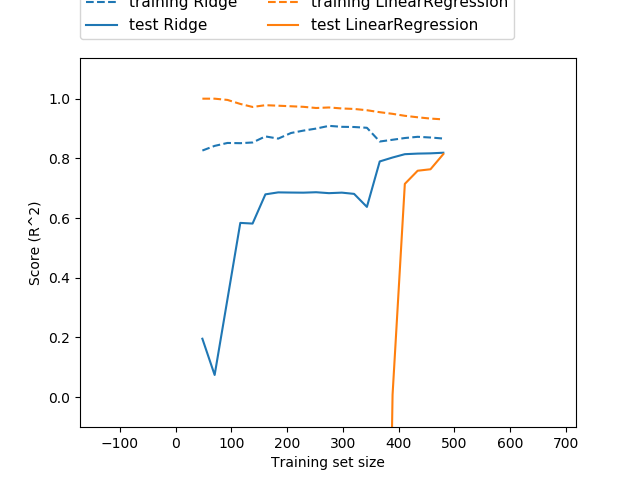

In [24]:
mglearn.plots.plot_ridge_n_samples()

## Lasso

An alternative to `Ridge` for regularizing linear regression is `Lasso`. Lasso also restricts coefficients to be closed to be zero, but in a slightly different way called L1 regularization. The consequence is that some coefficients are exactly zero. This means that some features are ignored by the model. This can be seen as an automatic feature selection. This often makes a model easier to interpret, and can reveal the most important features of your model.

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting. Similarly to Ridge, Lasso also has a regularization parameter, `alpha` that controls how strongly coefficients are pushed to zero.

In [28]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower `alpha` allowed us to fit a more complex model, which worked better on the training and test data. We are only using 33 out of 105 features. This makes the model potentially easier to understand. 

If we set the `alpha` lower, we remove the effect of regularization and end up overfitting, with a similar result to `LinearRegression`.

In [29]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


Again, we can plot the coefficients of the different models.

<IPython.core.display.Javascript object>


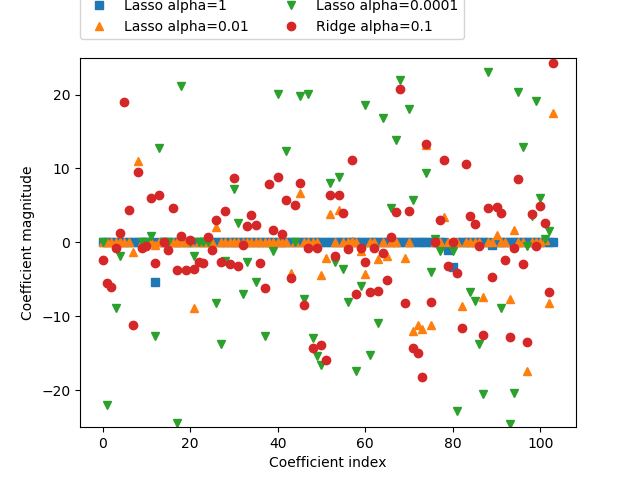

In [32]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude");

## Linear models for classication

Linear models are also extensively used for classification. A prediction is made using the following formula:

$$\hat{y} = w_0 \cdot x_0 + w_1 \cdot x_1 + \ldots + w_p \cdot x_p + b > 0$$

If the function is smaller than zero, we predict the class -1; if it is larger than zero, we predict the class +1.

For linear models regression, the output, $\hat{y}$, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). With linear models for classification a _decision boundary_ is a linear function of the input.

The two most common linear classification algorithms are _logistic regression_, implemented in `linear_model.LogisticRegression`, and _linear support vector machines_ (linear SVMs), implemented in `svm.LinearSVC` (SVC stands for support vector classifier).

<IPython.core.display.Javascript object>


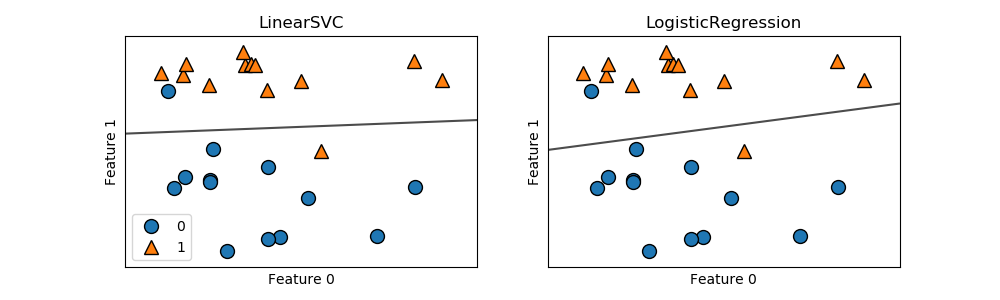

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
axes[0].legend();

The two models come up with similar decision boundaries. Note that both misclassify two of the points. By default, both models apply an L2 regularization, in the same way that `Ridge` does.

For `LogisticRegression` and `LinearSVC` the trade-off parameter that determines the strength of the regularization is called `C`, and higher values of `C` correspond to _less_ regularization. In other words, while with low values of the parameter `C`, the models put more emphasis on finding a coefficient vector $w$ that is close to zero.

<IPython.core.display.Javascript object>


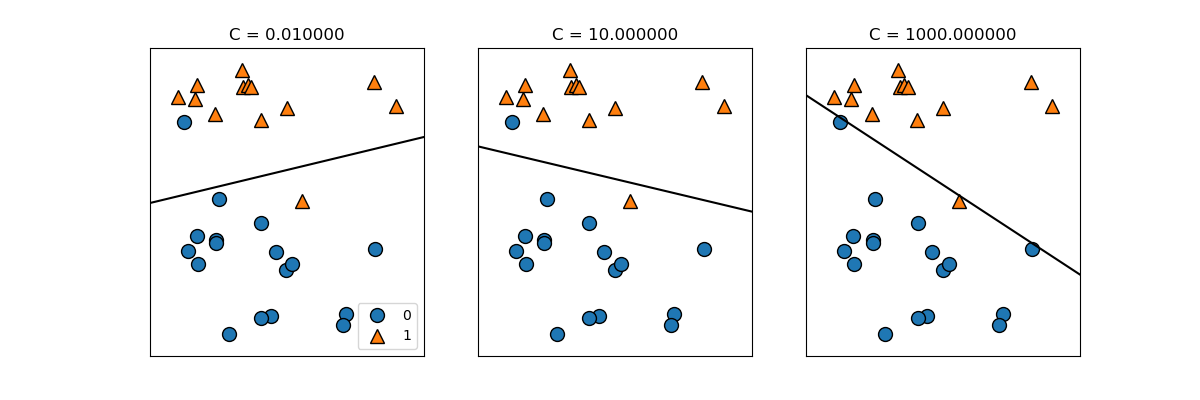

In [35]:
mglearn.plots.plot_linear_svc_regularization()

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.96


By default value of `C=1` provides quite good performance, with 95% accuracy on both the training and test set. But as training and test set performance are very close we are likely underfitting.

In [38]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.97
Test set score: 0.97


Using `C=100` results in higher training and test accuracy.

In [39]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.93


As expected, when moving more to the left along the scale from an already underfit model, both the training and test set accuracy decreases relative to the default parameters.

<IPython.core.display.Javascript object>


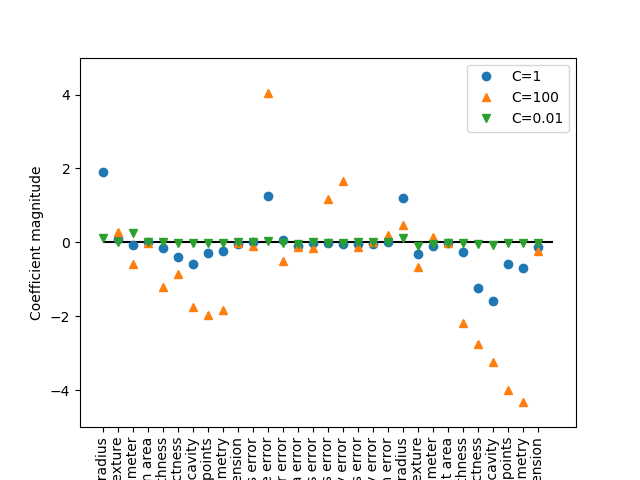

In [43]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend();

## Linear models for multiclass classification

A binary model is learned for each class that tries to seperate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all the classifiers are run on a test point. The classifier that has the highest score on its single class is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients and one intercept $b$ for each class.

$$w_0 \cdot x_0 + w_1 \cdot x_1 + \ldots + w_p \cdot x_p + b$$

<IPython.core.display.Javascript object>


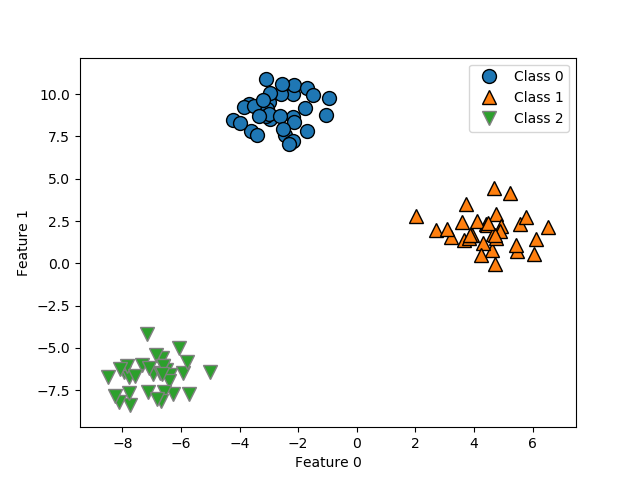

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"]);

Now we train the `LinearSVC` on this dataset.

In [48]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


Let's visualize the lines given by the three binary classifiers:

<IPython.core.display.Javascript object>


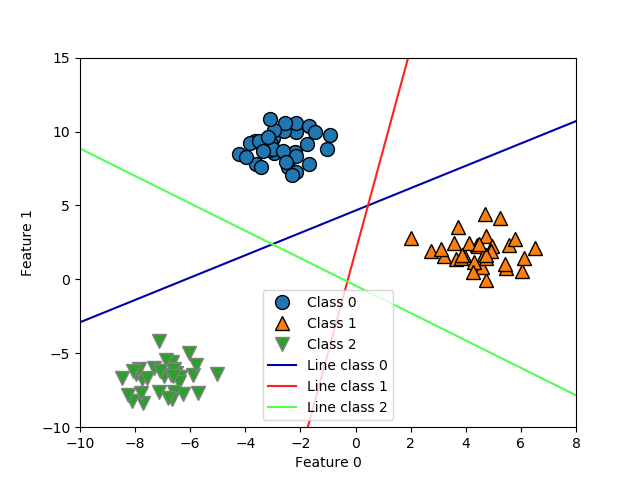

In [52]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"]);

The following example shows the predictions for all regions of the 2D space:

<IPython.core.display.Javascript object>


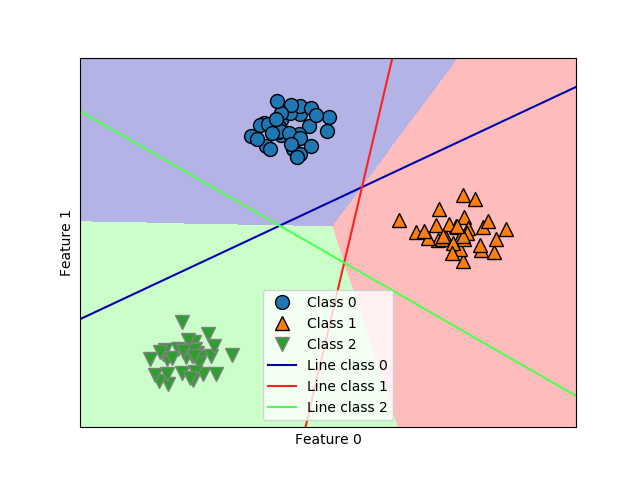

In [56]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

## Strengths

Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thousand or millions of samples, you might want to investigate using the `solver='sag'` option in `LogisticRegression` and `Ridge`, which can be faster than the default on large datasets (could also see `SGDClassifier`/`SGDRegressor`).

Another strength of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classification.

## Weaknesses

However, in lower-dimensional spaces, other models might yield better generalization performance.